<a href="https://colab.research.google.com/github/TasyaKh/FAPS/blob/main/%D0%A4%D0%90%D0%9F%D1%8B_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%9E%D0%B5%D0%BA%D1%81%D0%BA%D0%BE%D0%B3%D0%BE_%D0%BA%D1%83%D1%81%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
pt_x = [0.4, 0.22, 0.35, 0.26, 0.08, 0.45]
pt_y = [0.53, 0.38, 0.32, 0.19, 0.41, 0.30]

X = np.array([pt_x, pt_y]).T
X

array([[0.4 , 0.53],
       [0.22, 0.38],
       [0.35, 0.32],
       [0.26, 0.19],
       [0.08, 0.41],
       [0.45, 0.3 ]])

In [3]:
from scipy.spatial import distance_matrix
labels = ['p0', 'p1', 'p2', 'p3', 'p4', 'p5']
D = pd.DataFrame(distance_matrix(X, X), index = labels, columns = labels)
D.style.format('{:.2f}')

,p0,p1,p2,p3,p4,p5
p0,0.00,0.23,0.22,0.37,0.34,0.24
p1,0.23,0.00,0.14,0.19,0.14,0.24
p2,0.22,0.14,0.00,0.16,0.28,0.10
p3,0.37,0.19,0.16,0.00,0.28,0.22
p4,0.34,0.14,0.28,0.28,0.00,0.39
p5,0.24,0.24,0.10,0.22,0.39,0.00


[17 27 32 31 26  9 20 45 20 32  7 42 31 26 15 42 42 10 14 14 10  8  4 28
  9 14 10 24 14  9 18 26  5  5 11  7 17 10 24 18  5 20 15 11 10 27 16  4
 16 12 23 15 20 23 10 25 11 16 15 32 11  9 13 22 15 14 23 16 24 26  4 16
 32 26 10 17 10 28 18 12 21 22 14 11 27 23  4 11 36 11 22  3 33 22 16 10
 33 13 29 12 15 14 25 15  9 20 26  6 37 29 38 30 17 30 45  8 24 23 13 34
 23 17 20 33 14 25 20 16 17 32 20  9 35 25 19  8 36 16 26 26 43 22 19 16
 32 27 10 26 26 11 43 23 20]


array([[ 6.        , 11.        ,  3.        ,  2.        ],
       [ 1.        ,  7.        ,  4.        ,  2.        ],
       [ 4.        , 13.        ,  4.        ,  2.        ],
       [ 5.        , 17.        ,  4.        ,  2.        ],
       [ 2.        ,  3.        ,  5.        ,  2.        ],
       [10.        , 22.        ,  7.5       ,  3.        ],
       [19.        , 21.        ,  7.56637298,  4.        ],
       [ 0.        , 18.        ,  7.92148976,  3.        ],
       [ 8.        , 16.        ,  8.        ,  2.        ],
       [14.        , 24.        ,  9.09326674,  5.        ],
       [23.        , 27.        , 10.00932898,  8.        ],
       [15.        , 25.        , 10.68747969,  4.        ],
       [20.        , 28.        , 12.16167135, 10.        ],
       [ 9.        , 29.        , 15.47578754,  5.        ],
       [30.        , 31.        , 20.24327049, 15.        ],
       [12.        , 32.        , 25.28706301, 16.        ],
       [26.        , 33.

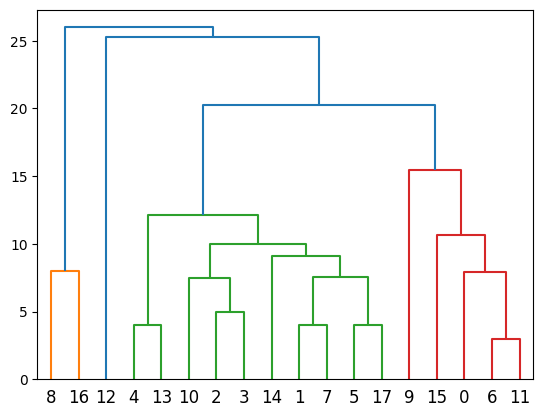

In [91]:
import scipy.cluster
import scipy.cluster.hierarchy as hierarchy
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import squareform

condensed_dist_matrix = [17,27,32,31,26,9,20,45,20,32,7,42,31,26,15,42,42
,10,14,14,10,8,4,28,9,14,10,24,14,9,18,26,5
,5,11,7,17,10,24,18,5,20,15,11,10,27,16,4
,16,12,23,15,20,23,10,25,11,16,15,32,11,9
,13,22,15,14,23,16,24,26,4,16,32,26,10
,17,10,28,18,12,21,22,14,11,27,23,4
,11,36,11,22,3,33,22,16,10,33,13
,29,12,15,14,25,15,9,20,26,6
,37,29,38,30,17,30,45,8,24
,23,13,34,23,17,20,33,14
,25,20,16,17,32,20,9
,35,25,19,8,36,16
,26,26,43,22,19
,16,32,27,10
,26,26,11
,43,23
,20
]

distanse_matrix = [[0,17,27,32,31,26,9,20,45,20,32,7,42,31,26,15,42,42]
,[17,0,10,14,14,10,8,4,28,9,14,10,24,14,9,18,26,5]
,[27,10,0,5,11,7,17,10,24,18,5,20,15,11,10,27,16,4]
,[32,14,5,0,16,12,23,15,20,23,10,25,11,16,15,32,11,9]
,[31,14,11,16,0,13,22,15,14,23,16,24,26,4,16,32,26,10]
,[26,10,7,12,13,0,17,10,28,18,12,21,22,14,11,27,23,4]
,[9,8,17,23,22,17,0,11,36,11,22,3,33,22,16,10,33,13]
,[20,4,10,15,15,10,11,0,29,12,15,14,25,15,9,20,26,6]
,[45,28,24,20,14,28,36,29,0,37,29,38,30,17,30,45,8,24]
,[20,9,18,23,23,18,11,12,37,0,23,13,34,23,17,20,33,14]
,[32,14,5,10,16,12,22,15,29,23,0,25,20,16,17,32,20,9]
,[7,10,20,25,24,21,3,14,38,13,25,0,35,25,19,8,36,16]
,[42,24,15,11,26,22,33,25,30,34,20,35,0,26,26,43,22,19]
,[31,14,11,16,4,14,22,15,17,23,16,25,26,0,16,32,27,10]
,[26,9,10,15,16,11,16,9,30,17,17,19,26,16,0,26,26,11]
,[15,18,27,32,32,27,10,20,45,20,32,8,43,32,26,0,43,23]
,[42,26,16,11,26,23,33,26,8,33,20,36,22,27,26,43,0,20]
,[42,5,4,9,10,4,13,6,24,14,9,16,19,10,11,23,20,0]]


# print(D)
# dist_matrix = np.array([[0 , 0.53],
#        [0.53, 0]]).T
condensed_dist_matrix = squareform(distanse_matrix)
# print(condensed_dist_matrix)

# Z = hierarchy.linkage(X, 'complete')
Z = hierarchy.linkage(condensed_dist_matrix, method='centroid')
hierarchy.dendrogram(Z);
print(condensed_dist_matrix)
Z

In [95]:
# long lat
settlements = np.array([[52.54583,104.69889],
[52.56083,104.50778],
[52.62194,104.44722],
[52.66111,104.44722],
[52.65389,104.53806],
[52.58806,104.40833],
[52.57389,104.60833],
[52.55111,104.50639],
[52.73083,104.54472],
[52.60889,104.52083],
[52.65556,104.39444],
[52.59361,104.61528],
[52.71306,104.32694],
[52.65806,104.50417],
[52.52861,104.44111],
[52.64167,104.56722],
[52.75083,104.45722],
[52.58917,104.46083]
])

# settlements names
labels = ["0 д. Бургаз","1 д. Бутырки","2 д. Галки","3 д. Егоровщина","4 д. Жердовка","5 д. Зыкова","6 д. Каштак","7 д. Коты","8 д . Кыцигировка","9 д. Максимовщина","10 д. Мишонкова","11 д. Ревякина","12 д. Рязановщина","13 д. Сосновый Бор","14 д. Турская","15 д. Черемушка","16 с. Никольск ","17 с. Оек" ]

## Определить центры кластеров, где наиболее благоприятно фапы поставить

<ipython-input-116-a8eef18817a6>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  class_colors = plt.cm.get_cmap('tab10', len(unique_classes))  # Generate colors based on the number of unique classes


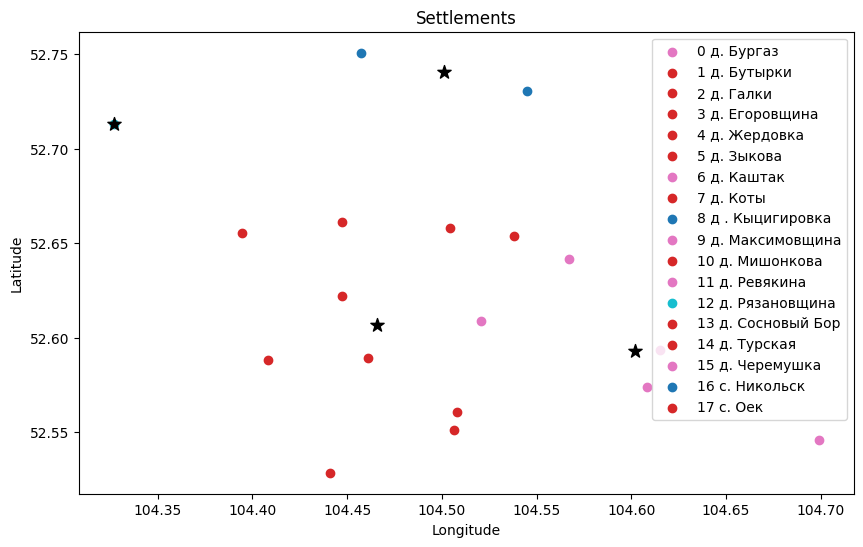

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

def plot_settlements(names, latitudes, longitudes, classes):

    unique_classes = np.unique(classes)

    class_colors = plt.cm.get_cmap('tab10', len(unique_classes))  # Generate colors based on the number of unique classes

    fig, ax = plt.subplots(figsize=(10, 6))  # Set the figure size

    for name, lat, lon, settlement_class in zip(names, latitudes, longitudes, classes):
        class_index = np.where(unique_classes == settlement_class)[0][0]  # Get the index of the settlement class
        color = class_colors(class_index)
        ax.scatter(lon, lat, label=name, color=color)

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Settlements')

    ax.legend()

    # Calculate cluster centers
    cluster_centers = []
    for cluster_id in np.unique(clusters):
      cluster_latitudes = [latitudes[i] for i in range(len(latitudes)) if clusters[i] == cluster_id]
      cluster_longitudes = [longitudes[i] for i in range(len(longitudes)) if clusters[i] == cluster_id]
      center_latitude = np.mean(cluster_latitudes)
      center_longitude = np.mean(cluster_longitudes)
      cluster_centers.append((center_latitude, center_longitude))

    for center in cluster_centers:
      ax.scatter(center[1], center[0], marker='*', s=100, color='black')

    plt.show()


# Example data
settlement_names = labels
latitudes = settlements[:, 0]
longitudes =  settlements[:, 1]

clusters = fcluster(Z, 4, criterion="maxclust")
classes = clusters

plot_settlements(settlement_names, latitudes, longitudes, classes)

NameError: ignored